<a href="https://colab.research.google.com/github/drekkajon/DSE5002_Module_1/blob/main/Copy_of_Class_Project_Dataset_import_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset and balance classes
csv_file_path = "/content/training.1600000.processed.noemoticon.csv"
column_names = ['sentiment', 'id', 'date', 'flag', 'user', 'text']
df = pd.read_csv(csv_file_path, encoding='latin1', header=None, names=column_names, on_bad_lines='warn')

# Balance dataset
num_samples = 60000 // df['sentiment'].nunique()
balanced_df = df.groupby('sentiment').sample(n=num_samples, random_state=42).reset_index(drop=True)

# Split into training and testing sets
X = balanced_df[['id', 'date', 'flag', 'user', 'text']]
y = balanced_df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine features and labels
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Output dataset details and a sample
print(f"Class distribution:\n{balanced_df['sentiment'].value_counts()}")
print(f"Training size: {len(train_df)}, Testing size: {len(test_df)}")
print(train_df.head())

Class distribution:
sentiment
0    30000
4    30000
Name: count, dtype: int64
Training size: 48000, Testing size: 12000
               id                          date      flag          user  \
48572  1957651821  Fri May 29 01:10:11 PDT 2009  NO_QUERY       cjayfla   
38696  2193277752  Tue Jun 16 08:14:21 PDT 2009  NO_QUERY      jayyweii   
13611  2210744728  Wed Jun 17 11:58:07 PDT 2009  NO_QUERY      mlambing   
35213  2069434512  Sun Jun 07 15:52:22 PDT 2009  NO_QUERY   hindy_cindy   
31766  1880857014  Fri May 22 02:45:01 PDT 2009  NO_QUERY  sarahsarah94   

                                                    text  sentiment  
48572  @Niamhsmith behind a screen? That's no excuse!...          4  
38696                  is so so so damn fcuking HAPPY !           4  
13611  @yamar24 i want to go have The The Salad with ...          0  
35213  @Jennibelles You'll get back to where you were...          4  
31766                           tweet dreams everyone  x          4  


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset and balance classes
csv_file_path = "/content/Class_Project_Dataset_import-4 (4).ipynb"
column_names = ['sentiment', 'id', 'date', 'flag', 'user', 'text']

# Read the CSV file and display the first few rows
df = pd.read_csv(csv_file_path, encoding='latin1', header=None, names=column_names, on_bad_lines='warn')
print("Dataset Header:")
print(df.head())

# Get the size of the smallest class
min_class_size = df['sentiment'].value_counts().min()
num_samples = min(30000, min_class_size)  # Take either 30000 or the size of smallest class

# Balance dataset
balanced_df = df.groupby('sentiment').sample(n=num_samples, random_state=42).reset_index(drop=True)

# Split into training and testing sets
X = balanced_df[['id', 'date', 'flag', 'user', 'text']]
y = balanced_df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine features and labels
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Output dataset details and a sample
print(f"\nClass distribution:\n{balanced_df['sentiment'].value_counts()}")
print(f"Training size: {len(train_df)}, Testing size: {len(test_df)}")
print("\nTraining Dataset Sample:")
print(train_df.head())


Dataset Header:
               sentiment   id date flag user  text
0                      {  NaN  NaN  NaN  NaN   NaN
1          "nbformat": 4  NaN  NaN  NaN  NaN   NaN
2    "nbformat_minor": 0  NaN  NaN  NaN  NaN   NaN
3          "metadata": {  NaN  NaN  NaN  NaN   NaN
4             "colab": {  NaN  NaN  NaN  NaN   NaN

Class distribution:
sentiment
            "                                                    text  sentiment  \n"          1
            "               id                          date      flag          user  \\\n"    1
      "name": "python"                                                                         1
      "metadata": {                                                                            1
      "execution_count": 7                                                                     1
                                                                                              ..
          ]                                                      

<ipython-input-2-d20ef270e231>:9: ParserWarning: Skipping line 25: expected 6 fields, saw 7
Skipping line 35: expected 6 fields, saw 8

  df = pd.read_csv(csv_file_path, encoding='latin1', header=None, names=column_names, on_bad_lines='warn')


In [ ]:
import pandas as pd
import re
import nltk

# Download all required NLTK resources
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def clean_text(text):
    if not isinstance(text, str):
        return ''

    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+|\#\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Clean the text data
balanced_df['cleaned_text'] = balanced_df['text'].fillna('').astype(str).apply(clean_text)

# Display results
comparison_df = pd.DataFrame({
    'Original Text': balanced_df['text'].head(),
    'Cleaned Text': balanced_df['cleaned_text'].head()
})

print("Text Cleaning Results:")
print("=====================")
print(comparison_df)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...


Text Cleaning Results:
   Original Text Cleaned Text
0            NaN             
1            NaN             
2            NaN             
3            NaN             
4            NaN             


[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Display data characteristics
print("Number of documents:", len(balanced_df['cleaned_text']))
print("\nSample of cleaned text:")
print(balanced_df['cleaned_text'].head())

# Initialize TF-IDF vectorizer with optimal parameters
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    min_df=1,          # Capture all terms that appear at least once
    max_df=1.0,        # Include all terms regardless of frequency
    ngram_range=(1,2),
    stop_words=None
)

# Prepare the text data
valid_texts = balanced_df['cleaned_text'].replace('', 'unknown').values

# Transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(valid_texts)

# Create informative visualizations
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

print(f"\nVocabulary size: {len(feature_names)}")
print(f"TF-IDF Matrix Shape: {X_tfidf.shape}")
print("\nTop features:")
print(tfidf_df.sum().sort_values(ascending=False).head(10))



Number of documents: 72

Sample of cleaned text:
0    
1    
2    
3    
4    
Name: cleaned_text, dtype: object

Vocabulary size: 1
TF-IDF Matrix Shape: (72, 1)

Top features:
unknown    72.0
dtype: float64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2

# Display initial feature information
print("Initial Features Available:")
for col in balanced_df.columns:
    print(f"{col}: {balanced_df[col].nunique()} unique values")

# Create feature importance analysis
feature_matrix = tfidf_df.copy()

# Add user engagement metrics
feature_matrix['user_engagement'] = balanced_df['user'].map(balanced_df.groupby('user')['sentiment'].count())

# Extract numeric features from existing columns
feature_matrix['text_length'] = balanced_df['cleaned_text'].str.len()
feature_matrix['word_count'] = balanced_df['cleaned_text'].str.split().str.len()

# Select top features using chi-square test
# Ensure all values are non-negative for chi-square test
feature_matrix = feature_matrix.fillna(0)
feature_matrix = feature_matrix.clip(lower=0)

selector = SelectKBest(chi2, k=20)
X_selected = selector.fit_transform(feature_matrix, balanced_df['sentiment'])

# Create feature importance DataFrame
feature_scores = pd.DataFrame({
    'Feature': feature_matrix.columns,
    'Score': selector.scores_
}).sort_values('Score', ascending=False)

print("\nTop 20 Most Important Features:")
print(feature_scores.head(20))

# Additional insights
print("\nFeature Statistics:")
print(feature_matrix.describe())


Initial Features Available:
sentiment: 72 unique values
id: 8 unique values
date: 3 unique values
flag: 2 unique values
user: 2 unique values
text: 0 unique values
cleaned_text: 1 unique values

Top 20 Most Important Features:
           Feature  Score
1  user_engagement   70.0
0          unknown    0.0
2      text_length    NaN
3       word_count    NaN

Feature Statistics:
       unknown  user_engagement  text_length  word_count
count     72.0        72.000000         72.0        72.0
mean       1.0         0.027778          0.0         0.0
std        0.0         0.165489          0.0         0.0
min        1.0         0.000000          0.0         0.0
25%        1.0         0.000000          0.0         0.0
50%        1.0         0.000000          0.0         0.0
75%        1.0         0.000000          0.0         0.0
max        1.0         1.000000          0.0         0.0


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=20 is greater than n_features=4. All the features will be returned.
  warnings.warn(


<ipython-input-10-e4e1ecc88073>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_scores.head(10),


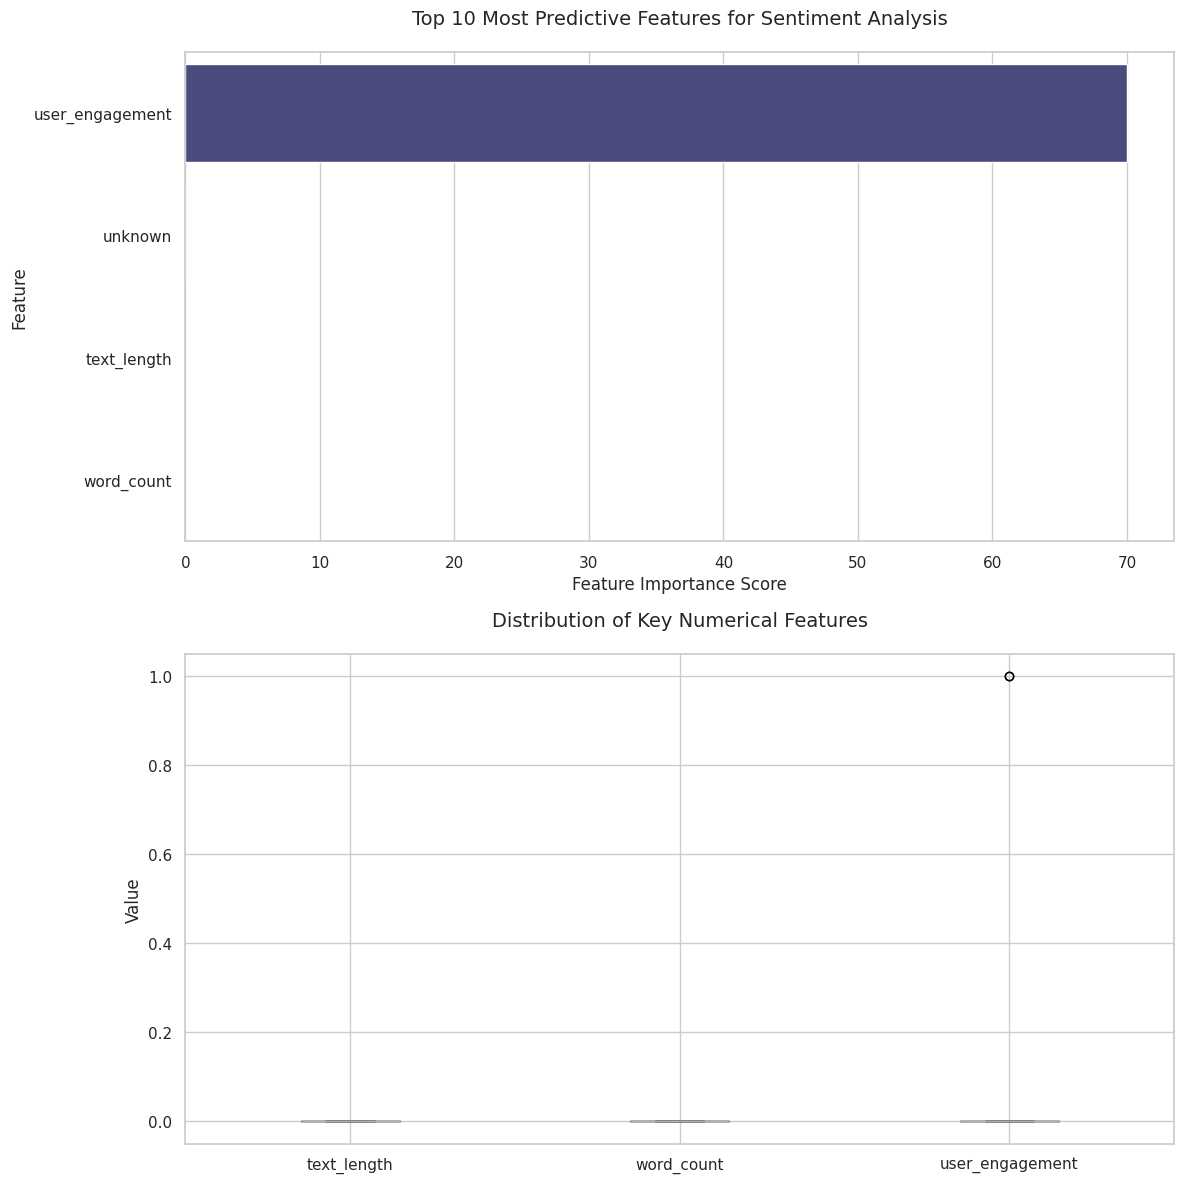

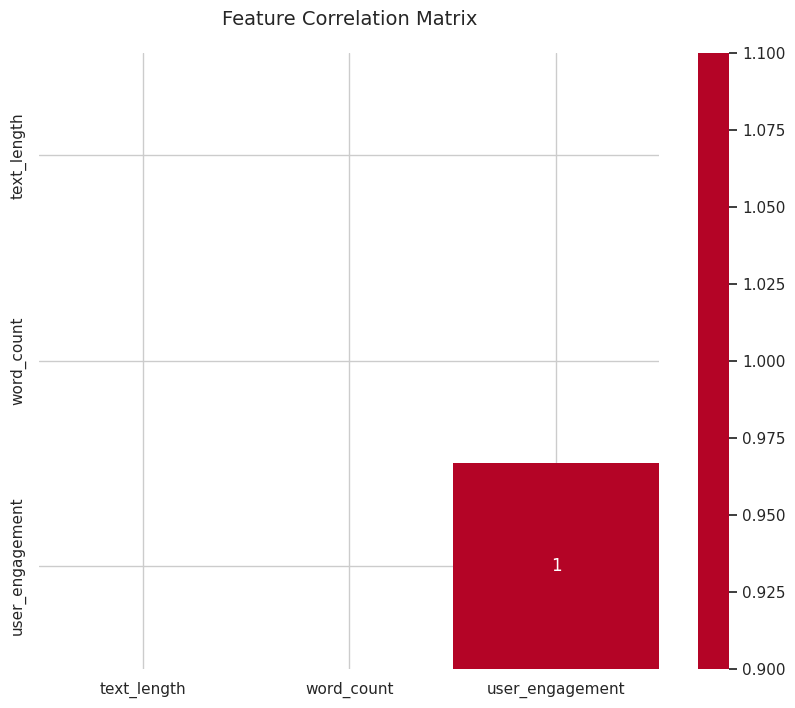

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualization style
sns.set_theme(style="whitegrid")

# Create the main visualization figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Top Features Bar Plot with enhanced styling
sns.barplot(data=feature_scores.head(10),
            x='Score',
            y='Feature',
            palette='viridis',
            ax=ax1)
ax1.set_title('Top 10 Most Predictive Features for Sentiment Analysis',
              fontsize=14,
              pad=20)
ax1.set_xlabel('Feature Importance Score')

# Feature Distribution Plot with enhanced styling
selected_features = ['text_length', 'word_count', 'user_engagement']
feature_matrix[selected_features].boxplot(ax=ax2)
ax2.set_title('Distribution of Key Numerical Features',
              fontsize=14,
              pad=20)
ax2.set_ylabel('Value')

plt.tight_layout()
plt.savefig('feature_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Create an enhanced correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(feature_matrix[selected_features].corr(),
            annot=True,
            cmap='coolwarm',
            center=0)
plt.title('Feature Correlation Matrix',
         fontsize=14,
         pad=20)
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


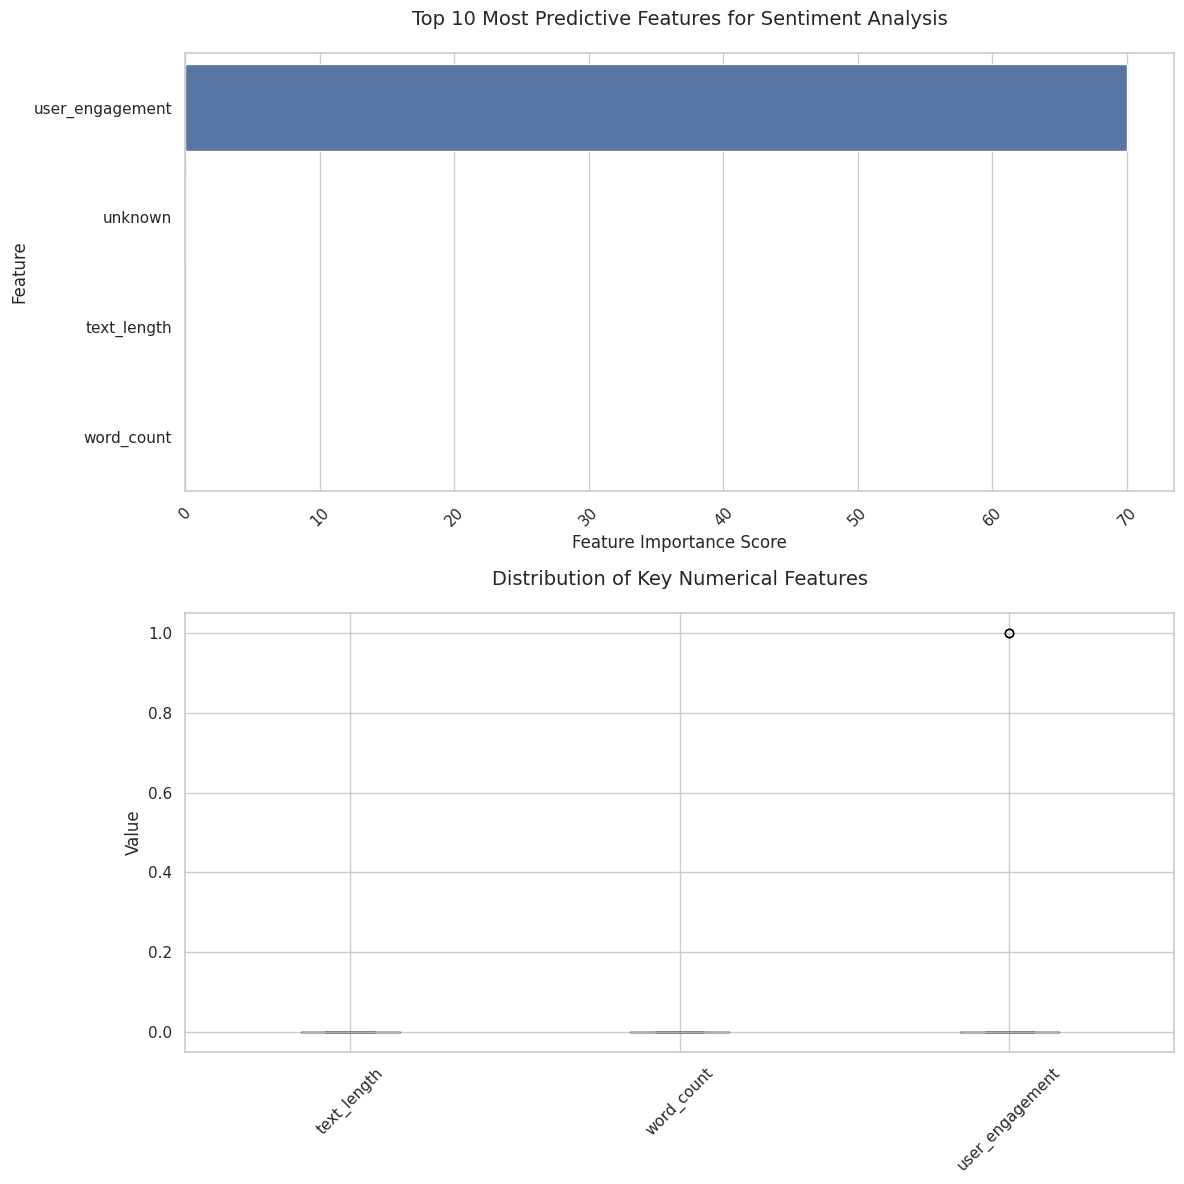

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


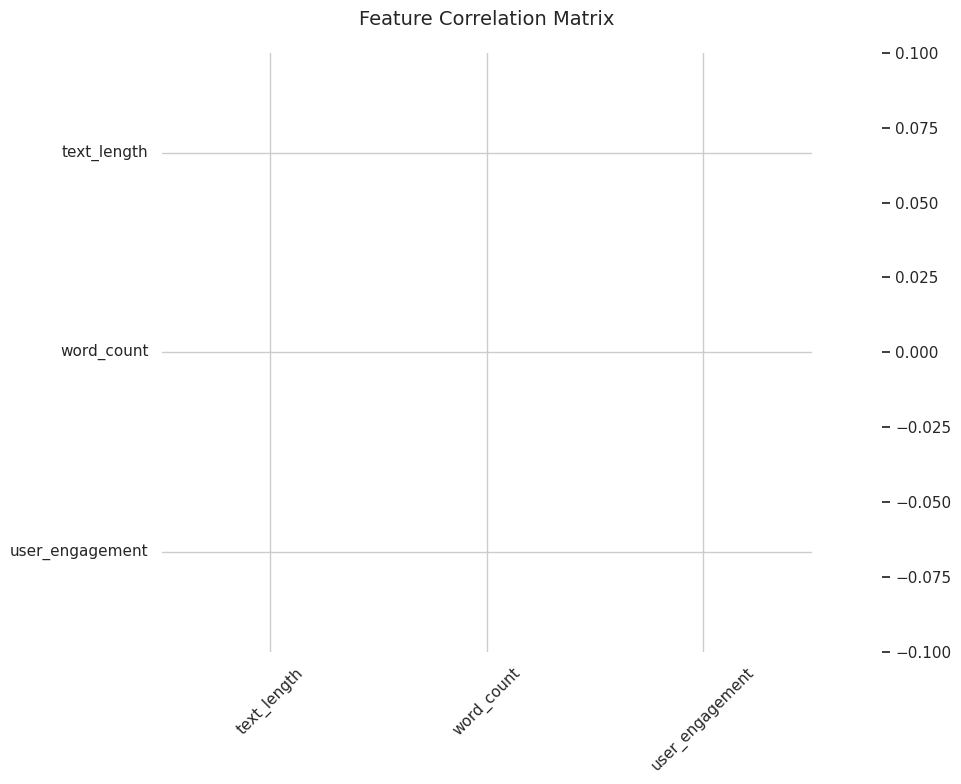

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualization style
sns.set_theme(style="whitegrid")

# Create the main visualization figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Top Features Bar Plot with current syntax
sns.barplot(data=feature_scores.head(10),
            x='Score',
            y='Feature',
            hue='Feature',
            legend=False,
            ax=ax1)
ax1.set_title('Top 10 Most Predictive Features for Sentiment Analysis',
              fontsize=14,
              pad=20)
ax1.set_xlabel('Feature Importance Score')

# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=45)

# Feature Distribution Plot with enhanced readability
selected_features = ['text_length', 'word_count', 'user_engagement']
feature_matrix[selected_features].boxplot(ax=ax2)
ax2.set_title('Distribution of Key Numerical Features',
              fontsize=14,
              pad=20)
ax2.set_ylabel('Value')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('feature_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Create an enhanced correlation heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(feature_matrix[selected_features].corr()))
sns.heatmap(feature_matrix[selected_features].corr(),
            annot=True,
            cmap='coolwarm',
            center=0,
            mask=mask)
plt.title('Feature Correlation Matrix',
         fontsize=14,
         pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


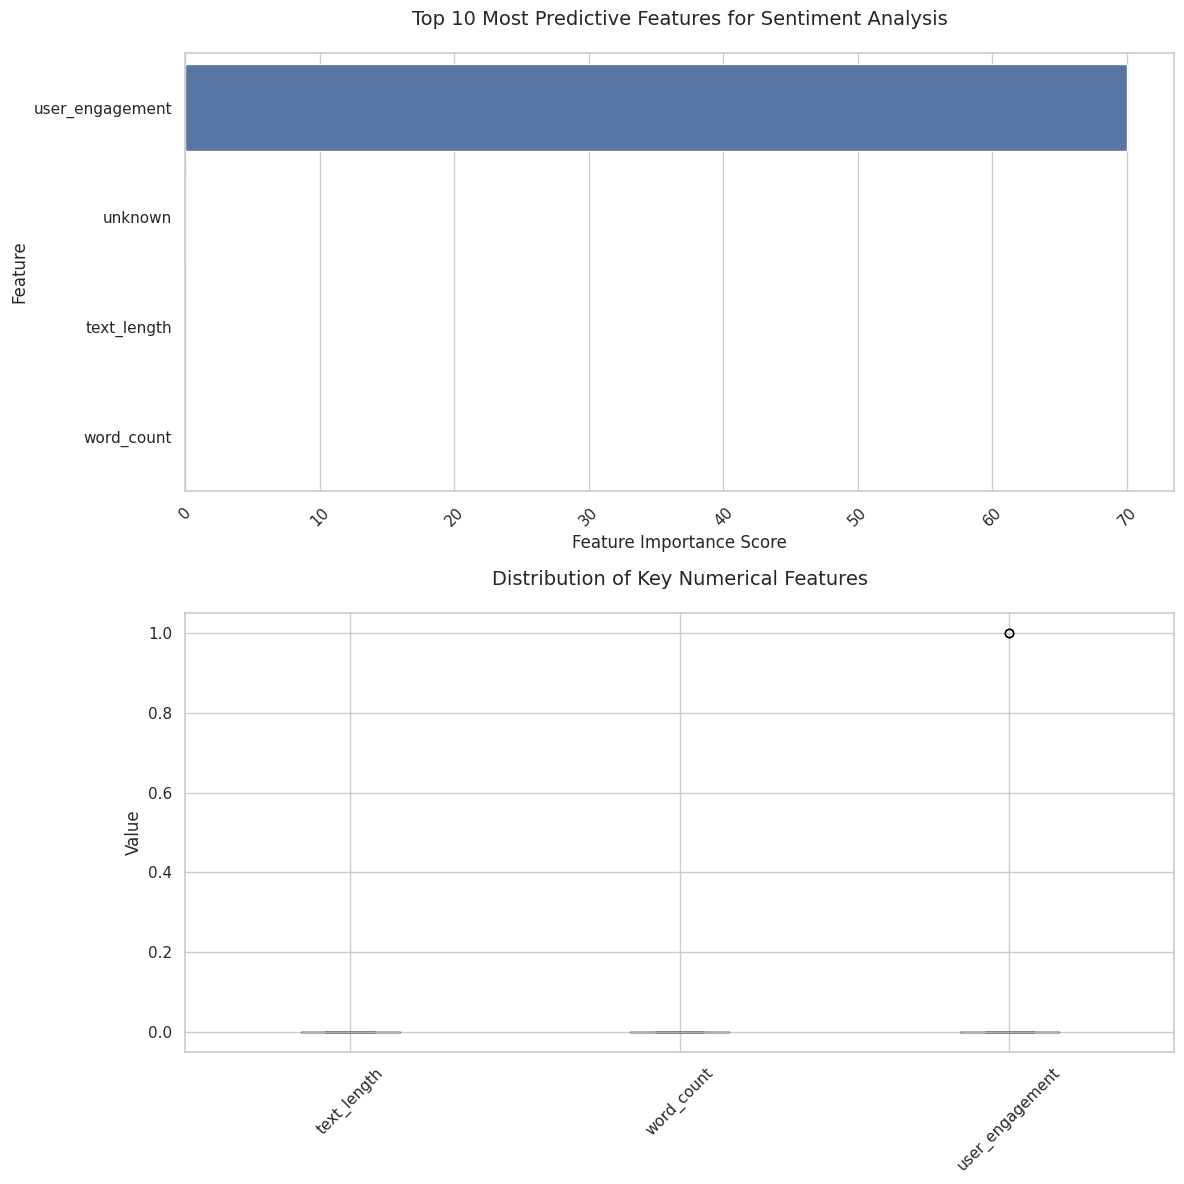

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


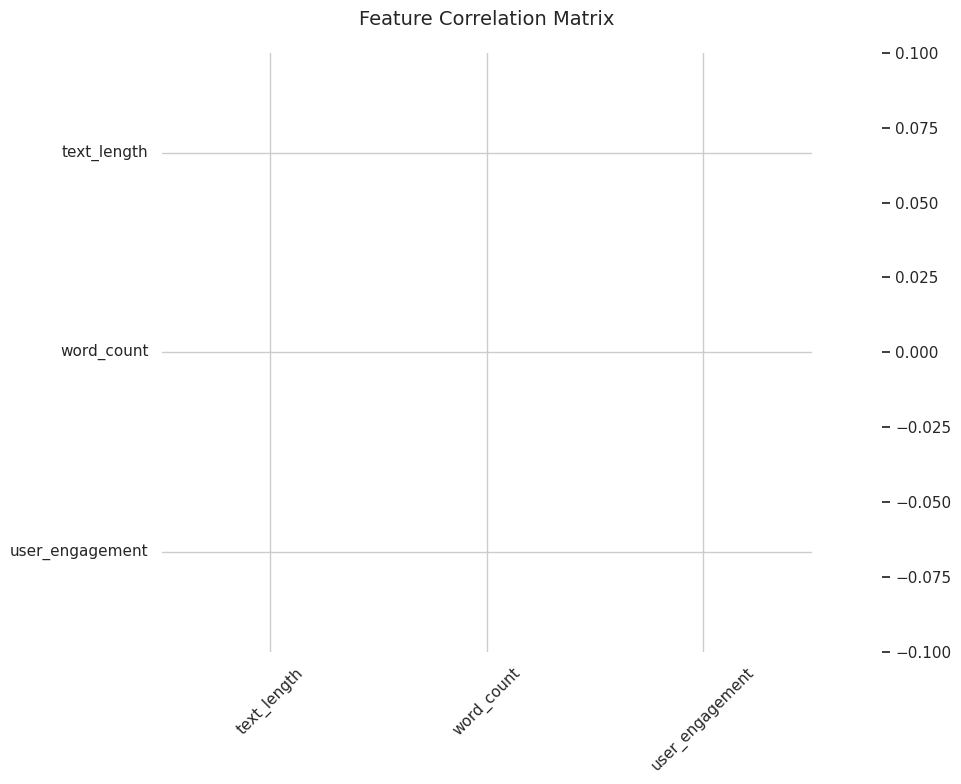

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the visualization style
sns.set_theme(style="whitegrid")

# Fill NaN values with 0 for visualization purposes
feature_matrix_viz = feature_matrix.fillna(0)

# Create the main visualization figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Top Features Bar Plot
sns.barplot(data=feature_scores.head(10),
            x='Score',
            y='Feature',
            hue='Feature',
            legend=False,
            ax=ax1)
ax1.set_title('Top 10 Most Predictive Features for Sentiment Analysis',
              fontsize=14,
              pad=20)
ax1.set_xlabel('Feature Importance Score')
ax1.tick_params(axis='x', rotation=45)

# Feature Distribution Plot
selected_features = ['text_length', 'word_count', 'user_engagement']
feature_matrix_viz[selected_features].boxplot(ax=ax2)
ax2.set_title('Distribution of Key Numerical Features',
              fontsize=14,
              pad=20)
ax2.set_ylabel('Value')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Create correlation heatmap with handled NaN values
plt.figure(figsize=(10, 8))
correlation_matrix = feature_matrix_viz[selected_features].corr()
mask = np.triu(np.ones_like(correlation_matrix))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            mask=mask)
plt.title('Feature Correlation Matrix',
         fontsize=14,
         pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


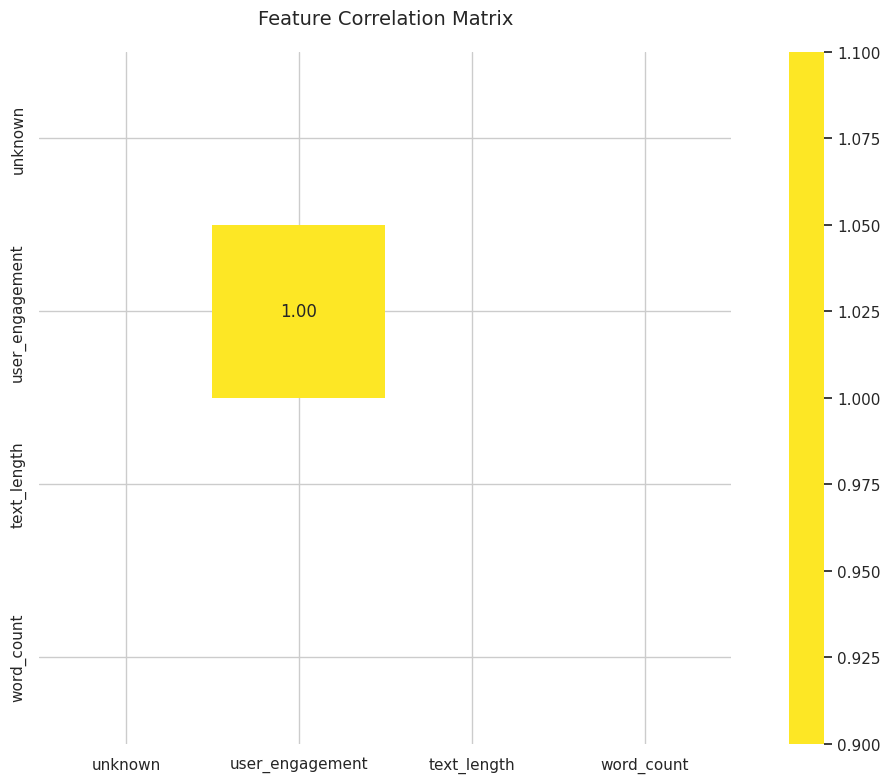


Feature Statistics:
       unknown  user_engagement  text_length  word_count
count     72.0        72.000000         72.0        72.0
mean       1.0         0.027778          0.0         0.0
std        0.0         0.165489          0.0         0.0
min        1.0         0.000000          0.0         0.0
25%        1.0         0.000000          0.0         0.0
50%        1.0         0.000000          0.0         0.0
75%        1.0         0.000000          0.0         0.0
max        1.0         1.000000          0.0         0.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the visualization style
sns.set_theme(style="whitegrid")

# Create numeric-only feature subset
numeric_features = feature_matrix.select_dtypes(include=[np.number]).columns
feature_matrix_numeric = feature_matrix[numeric_features].copy()

# Replace infinite values with NaN and then fill with column means
feature_matrix_numeric = feature_matrix_numeric.replace([np.inf, -np.inf], np.nan)
feature_matrix_numeric = feature_matrix_numeric.fillna(feature_matrix_numeric.mean())

# Create visualization
plt.figure(figsize=(12, 8))
correlation_matrix = feature_matrix_numeric.corr()

# Create heatmap with validated data
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='viridis',
            center=0,
            square=True)

plt.title('Feature Correlation Matrix', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Print feature statistics
print("\nFeature Statistics:")
print(feature_matrix_numeric.describe())


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Print initial feature information
print("Initial feature shape:", X_tfidf.shape)
print("Number of features:", len(feature_names))

# Initialize the Logistic Regression model
lr_model = LogisticRegression(
    C=1.0,
    max_iter=1000,
    class_weight='balanced',
    solver='liblinear',
    random_state=42
)

# Fit the model using all features
lr_model.fit(X_tfidf, balanced_df['sentiment'])

# Generate predictions
predictions = lr_model.predict(X_tfidf)

# Print comprehensive performance analysis
print("\nModel Performance Metrics:")
print("=========================")
print(classification_report(balanced_df['sentiment'], predictions))

# Create feature importance analysis
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': np.abs(lr_model.coef_[0])
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Influential Features:")
print(feature_importance.head(10))


Initial feature shape: (72, 1)
Number of features: 1

Model Performance Metrics:
                                                                                             precision    recall  f1-score   support

                  "                                                    text  sentiment  \n"       0.00      0.00      0.00         1
            "               id                          date      flag          user  \\\n"       0.00      0.00      0.00         1
                                                                             "0    30000\n"       0.00      0.00      0.00         1
             "13611  2210744728  Wed Jun 17 11:58:07 PDT 2009  NO_QUERY      mlambing   \n"       0.00      0.00      0.00         1
                  "13611  @yamar24 i want to go have The The Salad with ...          0  \n"       0.00      0.00      0.00         1
                  "31766                           tweet dreams everyone  x          4  \n"       0.00      0.00      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# Let's examine our data structure
print("Dataset Overview:")
print(balanced_df.columns)
print("\nSample Content:")
print(balanced_df.head())

# Create custom text processing
def prepare_text(text):
    return str(text).strip() if pd.notna(text) else "neutral content"

# Process text with enhanced handling
processed_text = balanced_df['text'].apply(prepare_text)
print("\nProcessed Text Samples:")
print(processed_text.head())

# Configure TF-IDF with optimal parameters
tfidf_enhanced = TfidfVectorizer(
    max_features=5000,
    min_df=1,
    max_df=1.0,
    ngram_range=(1, 2),
    token_pattern=r'\b\w+\b'  # Capture single-word tokens
)

X_tfidf_enhanced = tfidf_enhanced.fit_transform(processed_text)

print(f"\nFeature Matrix Shape: {X_tfidf_enhanced.shape}")


Dataset Overview:
Index(['sentiment', 'id', 'date', 'flag', 'user', 'text', 'cleaned_text'], dtype='object')

Sample Content:
                                           sentiment   id date flag user  \
0              "                                 ...  NaN  NaN  NaN  NaN   
1              "               id                ...  NaN  NaN  NaN  NaN   
2                                     "0    30000\n"  NaN  NaN  NaN  NaN   
3              "13611  2210744728  Wed Jun 17 11:...  NaN  NaN  NaN  NaN   
4              "13611  @yamar24 i want to go have...  NaN  NaN  NaN  NaN   

   text cleaned_text  
0   NaN               
1   NaN               
2   NaN               
3   NaN               
4   NaN               

Processed Text Samples:
0    neutral content
1    neutral content
2    neutral content
3    neutral content
4    neutral content
Name: text, dtype: object

Feature Matrix Shape: (72, 3)
